<a href="https://colab.research.google.com/github/wubeshetA/ML/blob/main/supervised_learning/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

## **Linear Regression with One Variable**

The following is the very basic implementation of Linear regression with one variable.

## **Notes**

The goal of Linear regression model is to find a line (find w and b) that fits the data points best. This line is define by $$f_{w,b}(x) = wx + b \tag{1}$$

In linear regression, we utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$

To minimize the cost function (to find the best fitting line), gradient descent algorithm says:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [3]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [27]:
# Training data
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])


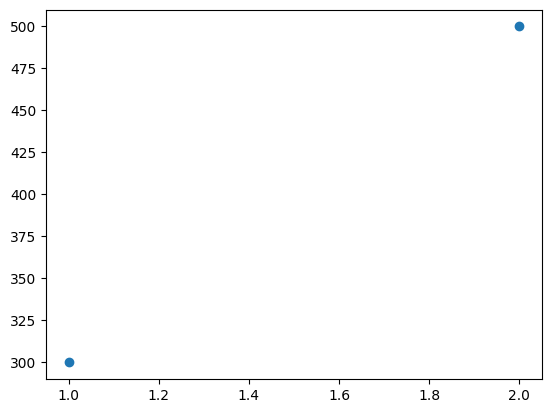

In [28]:
# raw data visualization
plt.scatter(x_train, y_train)
plt.show()

**Compute cost**

In [60]:
def cost(x_train, y_train, w, b):
  # cost function
  # here is the formula for cost (error):  mean square error
  """
  f_wb = w*x_train[i] + b
  MSE(mean squared error) = (∑((f_wb - y[i]) ** 2))/2*m = cost
  """
  m = len(x_train)
  total_error = 0
  for i in range(m):
    # calculate the total error
    f_wb = w*x_train[i] + b
    total_error += (f_wb - y_train[i])**2

  # average error (cost)
  avg_cost = total_error/(2*m)
  return avg_cost

In [61]:
def gradient(x_train, y_train, w, b):
  m = len(x_train)
  dJ_w = 0
  dJ_b = 0
  for i in range(m):
    # calculate the total error
    f_wb = w*x_train[i] + b
    dJ_w += ((f_wb - y_train[i])*x_train[i])
    dJ_b += ((f_wb - y_train[i]))
  # average error (cost)
  dJ_w = dJ_w / m
  dJ_b = dJ_b / m
  return (dJ_w, dJ_b)

In [101]:
# Find optimized W and B
history = []
def find_best_fiting(x_train, y_train, init_w, init_b, alpha, iteration):

  w = init_w
  b = init_b

  for i in range(iteration):
    # the following condition is just for plot and printing some values.
    if (i < 100 and i % 10 == 0) \
     or (i >= 100 and i <= 1000 and i % 100 == 0 )\
      or (i >= 1000 and i <= 10000 and i % 1000 == 0)\
       or (i >= 10_000 and i % 10_000 == 0):
       cost_v = cost(x_train, y_train, w, b)
       history.append((w, b, cost_v))
       print(f"{i}th, w: {w}, b: {b}, cost: {cost_v}")

    dJ_w, dJ_b = gradient(x_train, y_train, w, b)
    w = w - alpha * dJ_w
    b = b - alpha * dJ_b
  return (w, b)


In [104]:
alpha = 10**-1
iteration = 60_000
init_w = 0
init_b = 0

w, b = find_best_fiting(x_train, y_train, init_w, init_b, alpha, iteration)



0th, w: 0, b: 0, cost: 85000.0
10th, w: 187.3365192652637, b: 114.11368899906252, cost: 31.960145876394353
20th, w: 190.8378696388507, b: 114.72866110748565, cost: 10.97865028498776
30th, w: 191.5239647952593, b: 113.71306837386942, cost: 9.479412650313236
40th, w: 192.12296624983043, b: 112.74528659260064, cost: 8.18816207215246
50th, w: 192.67909616704983, b: 111.84547090276006, cost: 7.072801615524524
60th, w: 193.19595438151293, b: 111.0091770667899, cost: 6.109371340372474
70th, w: 193.67632211394098, b: 110.2319257534754, cost: 5.277175892031127
80th, w: 194.1227757335264, b: 109.50954862265883, cost: 4.558338958937293
90th, w: 194.53770958910619, b: 108.83817154124881, cost: 3.937419273051312
100th, w: 194.92334898582195, b: 108.2141938899617, cost: 3.401078917442066
200th, w: 197.55880460472218, b: 103.94993712273927, cost: 0.7864428607019248
300th, w: 198.82610899561894, b: 101.8993955441763, cost: 0.18185181472181672
400th, w: 199.43551421863552, b: 100.91335718041375, cost: 

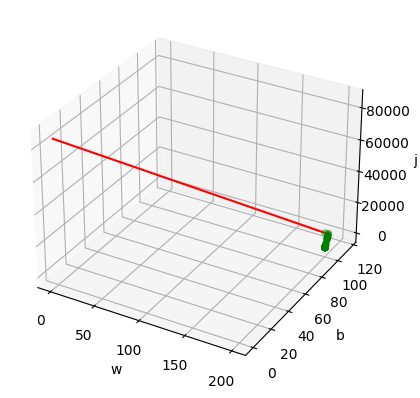

In [110]:
w, b, j = zip(*history)

# # Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# Plotting
ax.scatter(w[1:], b[1:], j[1:], color='green')
ax.plot(w, b, j, color='red')

ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('j')

plt.show()

## **Linear Regression with Multiple Variables(features)**





The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$, where $n$ is number of features

or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$
where $\cdot$ is a vector `dot product`  




### **Cost with Multiple Varaibles**

The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$





### **Finding optimized w, b with gradient descent**


Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{3}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{4}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{5}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


### Training data

 The training dataset contains three examples with four features (size, bedrooms, floors and, age) shown in the table below.  Note that, unlike the earlier labs, size is in sqft rather than 1000 sqft. This causes an issue, which you will solve in the next lab!

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

You will build a linear regression model using these values so you can then predict the price for other houses. For example, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.

In [4]:
# Training data
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [5]:
# Cost
def compute_cost(x, y, w, b):


  cost = 0
  m = len(x)
  for i in range(m):

    f_wb = np.dot(x[i], w) + b
    # if our model was on single feature the above would be
    # f_wb = X[i] * w + b
    cost = cost + ((f_wb - y[i])**2)
  cost = cost / (2*m) # cost (average error)
  return cost



Compute Gradient (slop) for Multiple features

In [9]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
    """
    m, n = x.shape # (number of examples, number of features)
    dj_dw = np.zeros((n, ))
    dj_db = 0
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        err = f_wb - y[i]
        dj_db += err
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * x[i, j]
    dj_dw /= m
    dj_db /= m

    return (dj_dw, dj_db)



In [11]:
def compute_best_fit(x_train, y_train, init_w, init_b, alpha, iteration):

    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      x_train (ndarray (m,n))   : Data, m examples with n features
      y_train (ndarray (m,))    : target values
      init_w (ndarray (n,)) : initial model parameters
      init_b (scalar)       : initial model parameter
      alpha (float)       : Learning rate
      iteration (int)     : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,)) : Updated values of parameters
      b (scalar)       : Updated value of parameter
      """
    w = init_w
    b = init_b
    for i in range(iteration):


        if (i < 100 and i % 10 == 0) \
        or (i >= 100 and i <= 1000 and i % 100 == 0 )\
         or (i >= 10_000 and i % 10_000 == 0):

         cost_v = compute_cost(x_train, y_train, w, b)
        #  history.append((w, b, cost_v))
         print(f"{i}th, w: {w}, b: {b}, cost: {cost_v}")

        dj_dw, dj_db = compute_gradient(x_train, y_train, w, b)
        # decrease w and b
        w = w - alpha * dj_dw
        b = b - alpha * dj_db


    return (w, b)

In [24]:
# initialize paramenters
init_w = np.zeros_like(x_train[0])
init_b = 0.
# gradient descent settings
iterations = 1000
alpha = 5.0e-7

# run gradient descent
w, b = compute_best_fit(x_train, y_train, init_w, init_b, alpha, iterations)


0th, w: [0 0 0 0], b: 0.0, cost: 49518.0
10th, w: [2.02184672e-01 4.98191696e-04 4.85540318e-05 4.39075551e-03], b: 9.93447426134968e-05, cost: 696.9718639233548
20th, w: [ 2.02203074e-01  5.31142534e-04 -6.63628987e-05  3.66547540e-03], b: 7.52101919780713e-05, cost: 696.8636174971624
30th, w: [ 2.02221453e-01  5.64091012e-04 -1.81263214e-04  2.94051918e-03], b: 5.1087043518004745e-05, cost: 696.7554660853489
40th, w: [ 0.20223982  0.00059704 -0.00029615  0.00221589], b: 2.6975301357397917e-05, cost: 696.6474096031822
50th, w: [ 0.20225819  0.00062998 -0.00041101  0.00149158], b: 2.8749604245047186e-06, cost: 696.5394479662783
60th, w: [ 0.20227654  0.00066292 -0.00052586  0.00076759], b: -2.121398435016689e-05, cost: 696.4315810903236
70th, w: [ 2.02294886e-01  6.95861673e-04 -6.40698346e-04  4.39339840e-05], b: -4.52915380338551e-05, cost: 696.3238088910889
80th, w: [ 0.20231322  0.0007288  -0.00075552 -0.0006794 ], b: -6.935770569154544e-05, cost: 696.2161312844124
90th, w: [ 0.202

### **Predictions**

In [22]:
print("trainig data:\n", x_train)
print(y_train)
print("-----------------")

print(w, b)
def predict(x, w, b):
    return np.dot(w, x) + b

for i in range(len(x_train)):
    print(f"prediction: {predict(x_train[i], w, b)}  actual: {y_train[i]}")

trainig data:
 [[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
[460 232 178]
-----------------
[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] -0.002235407530932535
prediction: 426.18530497189204  actual: 460
prediction: 286.1674720078562  actual: 232
prediction: 171.46763087132317  actual: 178
